In [37]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from schedule_report import create_report_for_schedules, get_schedules_of_vehicles, postprocess_schedules
from prepare_data import prepare_data, get_mappings

In [38]:
with open("routes_with_optuna_fined_params.json", "r") as f:
    routes = json.load(f)

In [39]:
schedules = get_schedules_of_vehicles(routes)
report = create_report_for_schedules(schedules)

In [40]:
incomes, times = prepare_data()
times['Total_Time'] = times['Total_Time'] - 10

In [41]:
report

,день,порядковый номер броневика,устройство,дата-время прибытия,дата-время отъезда
0,2022-09-01,0,608039,2022-09-01 08:00:00,2022-09-01 08:10:00
1,2022-09-01,1,677559,2022-09-01 08:00:00,2022-09-01 08:10:00
2,2022-09-01,1,634652,2022-09-01 08:17:00,2022-09-01 08:27:00
3,2022-09-01,1,646935,2022-09-01 08:35:00,2022-09-01 08:45:00
4,2022-09-01,1,662091,2022-09-01 09:16:00,2022-09-01 09:26:00
...,...,...,...,...,...
12098,2022-11-30,7,607509,2022-11-30 15:06:00,2022-11-30 15:16:00
12099,2022-11-30,7,644823,2022-11-30 15:21:00,2022-11-30 15:31:00
12100,2022-11-30,7,636762,2022-11-30 15:35:00,2022-11-30 15:45:00
12101,2022-11-30,7,606049,2022-11-30 15:54:00,2022-11-30 16:04:00


In [42]:
report.groupby("день").size().sort_values()

день
2022-09-01    133
2022-11-05    133
2022-11-04    133
2022-11-03    133
2022-11-02    133
             ... 
2022-09-27    133
2022-09-26    133
2022-09-25    133
2022-09-23    133
2022-11-30    133
Length: 91, dtype: int64

In [44]:
report[report["дата-время отъезда"].dt.hour >= 20]

,день,порядковый номер броневика,устройство,дата-время прибытия,дата-время отъезда
14,2022-09-01,1,619643,2022-09-01 20:00:00,2022-09-01 20:10:00
528,2022-09-04,7,699095,2022-09-04 20:00:00,2022-09-04 20:10:00
529,2022-09-04,7,606068,2022-09-04 20:12:00,2022-09-04 20:22:00
530,2022-09-04,7,607721,2022-09-04 20:28:00,2022-09-04 20:38:00
531,2022-09-04,7,608089,2022-09-04 21:08:00,2022-09-04 21:18:00
569,2022-09-05,3,616468,2022-09-05 19:50:00,2022-09-05 20:00:00
570,2022-09-05,3,634815,2022-09-05 20:06:00,2022-09-05 20:16:00
1397,2022-09-11,4,657920,2022-09-11 20:02:00,2022-09-11 20:12:00
1398,2022-09-11,4,676358,2022-09-11 20:48:00,2022-09-11 20:58:00
1528,2022-09-12,4,698942,2022-09-12 19:50:00,2022-09-12 20:00:00


In [45]:
final_report = postprocess_schedules(report)

In [46]:
final_report[final_report["дата-время отъезда"].dt.hour >= 20]

,день,порядковый номер броневика,устройство,дата-время прибытия,дата-время отъезда


In [47]:
import pandas as pd
from calculate_costs import flatten_list

collection_schedule = pd.DataFrame(
    {
        day.split()[0]: flatten_list(v["route"])
        for day, v in routes.items()
    }.items(),
    columns=["timestamp", "TID"]
).explode("TID")

In [48]:
collection_schedule = collection_schedule.sort_values(["TID", "timestamp"])
collection_schedule["prev_timestamp"] = collection_schedule.groupby("TID")["timestamp"].shift()
collection_schedule["prev_timestamp"] = collection_schedule["prev_timestamp"].fillna("2022-08-31")

In [49]:
sum(
    (pd.to_datetime(collection_schedule["timestamp"]) - pd.to_datetime(collection_schedule["prev_timestamp"])).dt.days
    > 14
)

0

In [50]:
collection_schedule.groupby("TID").size().sort_values()

TID
699664     6
669453     6
676308     6
676338     6
676345     6
          ..
605378    22
676981    25
406504    26
634558    33
605329    48
Length: 1630, dtype: int64

In [51]:
from calculate_costs import calc_daily_costs, find_daily_vehicles_cost

collection, funding, curr_sum = calc_daily_costs(routes)

In [52]:
find_daily_vehicles_cost(routes)

160000

In [ ]:
overall = pd.concat([
    pd.DataFrame({"статья расходов": "фондирование", **funding.sum(axis=0).to_dict()}, index=[0]),
    pd.DataFrame({"статья расходов": "инкассация", **collection.sum(axis=0).to_dict()}, index=[0]),
])
vehicles_cost = {dt: find_daily_vehicles_cost(routes) for dt in overall.drop("статья расходов", axis=1).columns}
overall = pd.concat([
    overall,
    pd.DataFrame({"статья расходов": "стоимость броневиков", **vehicles_cost}, index=[0]),
])
overall = pd.concat([
    overall,
    pd.DataFrame({"статья расходов": "итого", **overall.drop("статья расходов", axis=1).sum(axis=0).to_dict()}, index=[0]),
])

In [80]:
final_report[["дата-время прибытия", "дата-время отъезда"]] = final_report[["дата-время прибытия", "дата-время отъезда"]].astype(str)

with pd.ExcelWriter("report.xlsx", date_format="YYYY-MM-DD HH:MM") as writer:
    curr_sum.to_excel(writer, sheet_name="остатки на конец дня")
    funding.to_excel(writer, sheet_name="стоимость фондирования")
    collection.to_excel(writer, sheet_name="стоимость инкассации")
    final_report.drop("день", axis=1).to_excel(writer, sheet_name="маршруты", index=False)
    overall.to_excel(writer, sheet_name="итог", index=False)

In [114]:
overall

,статья расходов,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,...,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30
0,фондирование,22721.589041,23285.315068,23968.493151,24675.835616,25144.767123,25633.643836,25813.643836,26234.082192,26602.30137,...,26765.479452,26632.767123,25933.369863,25328.0,24702.246575,24373.972603,24327.123288,24626.30137,25116.109589,25892.931507
0,инкассация,14244.000000,13300.000000,13351.200000,13341.200000,13306.000000,13394.200000,13396.000000,13520.500000,13503.10000,...,13477.800000,13489.700000,13535.900000,13588.2,13545.100000,13552.000000,13564.800000,13468.00000,13546.500000,13552.300000
0,стоимость броневиков,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.00000,...,160000.000000,160000.000000,160000.000000,160000.0,160000.000000,160000.000000,160000.000000,160000.00000,160000.000000,160000.000000
0,итого,196965.589041,196585.315068,197319.693151,198017.035616,198450.767123,199027.843836,199209.643836,199754.582192,200105.40137,...,200243.279452,200122.467123,199469.269863,198916.2,198247.346575,197925.972603,197891.923288,198094.30137,198662.609589,199445.231507


In [79]:
final_report

,день,порядковый номер броневика,устройство,дата-время прибытия,дата-время отъезда
0,2022-09-01,0,608039,2022-09-01 08:00:00,2022-09-01 08:10:00
1,2022-09-01,1,677559,2022-09-01 08:00:00,2022-09-01 08:10:00
2,2022-09-01,1,634652,2022-09-01 08:17:00,2022-09-01 08:27:00
3,2022-09-01,1,646935,2022-09-01 08:35:00,2022-09-01 08:45:00
4,2022-09-01,1,662091,2022-09-01 09:16:00,2022-09-01 09:26:00
...,...,...,...,...,...
12098,2022-11-29,6,608073,2022-11-29 14:55:00,2022-11-29 15:05:00
12099,2022-11-30,2,635592,2022-11-30 17:07:00,2022-11-30 17:17:00
12100,2022-11-30,2,628973,2022-11-30 16:26:00,2022-11-30 16:36:00
12101,2022-11-30,2,698703,2022-11-30 16:23:00,2022-11-30 16:33:00


In [53]:
curr_sum

,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-10,...,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30
Устройство,,,,,,,,,,,,,,,,,,,,,
406136,160000,250000,355000,454000,561000,0,60000,135000,224000,319000,...,524000,615000,693000,693000,858000,858000,0,106000,200000,275000
406139,387000,490000,0,168000,292000,370000,535000,699000,873000,961000,...,0,164000,317000,468000,625000,831000,0,123000,261000,373000
406145,287000,430000,566000,0,117000,240000,380000,519000,657000,775000,...,574000,693000,793000,972000,0,118000,236000,350000,478000,599000
406148,355000,405000,478000,531000,0,75000,175000,228000,280000,362000,...,846000,0,55000,120000,205000,300000,368000,430000,430000,548000
406180,597000,0,82000,153000,225000,311000,366000,421000,496000,571000,...,213000,295000,351000,421000,480000,585000,655000,732000,819000,878000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699578,47000,47000,47000,57000,57000,67000,73000,73000,98000,98000,...,146000,0,10000,20000,34000,61000,71000,71000,116000,159000
699579,236000,285000,353000,353000,353000,366000,416000,416000,0,35000,...,455000,542000,610000,699000,780000,818000,0,0,104000,167000
699629,67000,130000,193000,256000,320000,394000,394000,515000,0,72000,...,402000,457000,506000,559000,606000,0,55000,109000,156000,218000


In [15]:
collection

,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-10,...,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30
Устройство,,,,,,,,,,,,,,,,,,,,,
406136,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,104.7,0.0,0.0,0.0
406139,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,113.2,0.0,0.0,0.0,0.0,0.0,101.3,0.0,0.0,0.0
406145,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,114.1,0.0,0.0,0.0,0.0,0.0
406148,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406180,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
699579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
699629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0


In [18]:
funding

,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-10,...,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30
Устройство,,,,,,,,,,,,,,,,,,,,,
406136,8.767123,13.698630,19.452055,24.876712,30.739726,0.000000,3.287671,7.397260,12.273973,17.479452,...,28.712329,33.698630,37.972603,37.972603,47.013699,47.013699,0.000000,5.808219,10.958904,15.068493
406139,21.205479,26.849315,0.000000,9.205479,16.000000,20.273973,29.315068,38.301370,47.835616,52.657534,...,0.000000,8.986301,17.369863,25.643836,34.246575,45.534247,0.000000,6.739726,14.301370,20.438356
406145,15.726027,23.561644,31.013699,0.000000,6.410959,13.150685,20.821918,28.438356,36.000000,42.465753,...,31.452055,37.972603,43.452055,53.260274,0.000000,6.465753,12.931507,19.178082,26.191781,32.821918
406148,19.452055,22.191781,26.191781,29.095890,0.000000,4.109589,9.589041,12.493151,15.342466,19.835616,...,46.356164,0.000000,3.013699,6.575342,11.232877,16.438356,20.164384,23.561644,23.561644,30.027397
406180,32.712329,0.000000,4.493151,8.383562,12.328767,17.041096,20.054795,23.068493,27.178082,31.287671,...,11.671233,16.164384,19.232877,23.068493,26.301370,32.054795,35.890411,40.109589,44.876712,48.109589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699578,2.575342,2.575342,2.575342,3.123288,3.123288,3.671233,4.000000,4.000000,5.369863,5.369863,...,8.000000,0.000000,0.547945,1.095890,1.863014,3.342466,3.890411,3.890411,6.356164,8.712329
699579,12.931507,15.616438,19.342466,19.342466,19.342466,20.054795,22.794521,22.794521,0.000000,1.917808,...,24.931507,29.698630,33.424658,38.301370,42.739726,44.821918,0.000000,0.000000,5.698630,9.150685
699629,3.671233,7.123288,10.575342,14.027397,17.534247,21.589041,21.589041,28.219178,0.000000,3.945205,...,22.027397,25.041096,27.726027,30.630137,33.205479,0.000000,3.013699,5.972603,8.547945,11.945205


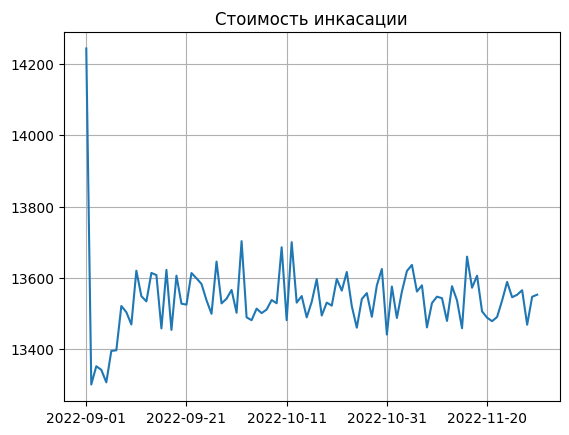

In [27]:
collection.sum(axis=0).plot();
plt.grid();
plt.title("Стоимость инкасации");

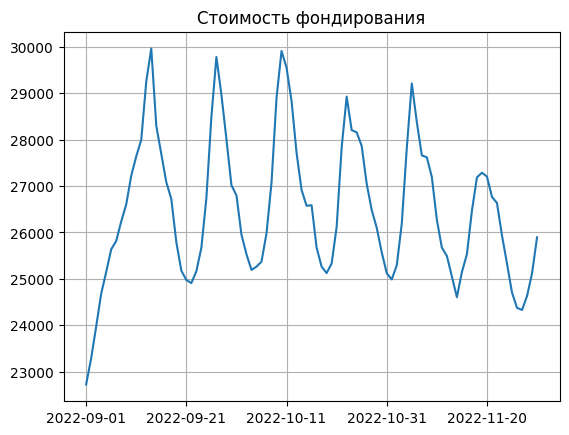

In [28]:
funding.sum(axis=0).plot();
plt.grid();
plt.title("Стоимость фондирования");

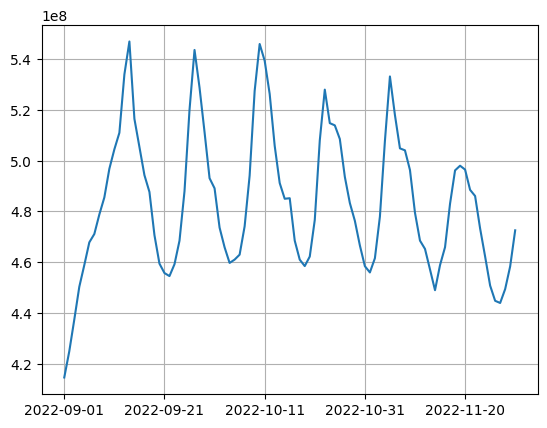

In [30]:
curr_sum.sum(axis=0).plot();
plt.grid();

In [31]:
final_report

,день,порядковый номер броневика,устройство,дата-время прибытия,дата-время отъезда
0,2022-09-01,0,608039,2022-09-01 08:00:00,2022-09-01 08:10:00
1,2022-09-01,1,677559,2022-09-01 08:00:00,2022-09-01 08:10:00
2,2022-09-01,1,634652,2022-09-01 08:17:00,2022-09-01 08:27:00
3,2022-09-01,1,646935,2022-09-01 08:35:00,2022-09-01 08:45:00
4,2022-09-01,1,662091,2022-09-01 09:16:00,2022-09-01 09:26:00
...,...,...,...,...,...
12098,2022-11-29,6,608073,2022-11-29 14:55:00,2022-11-29 15:05:00
12099,2022-11-30,2,635592,2022-11-30 17:07:00,2022-11-30 17:17:00
12100,2022-11-30,2,628973,2022-11-30 16:26:00,2022-11-30 16:36:00
12101,2022-11-30,2,698703,2022-11-30 16:23:00,2022-11-30 16:33:00


In [34]:
final_report["дата-время отъезда"] = pd.to_datetime(final_report["дата-время отъезда"])

In [40]:
from datetime import datetime

t = final_report.groupby(["день", "порядковый номер броневика"], as_index=False)["дата-время отъезда"].agg({
    "max"
})

In [45]:
((t["max"].dt.hour - 8) * 60 + t["max"].dt.minute / 700)

0       48
1      637
2      499
3      471
4      537
      ... 
706    658
707    474
708    526
709    483
710    498
Name: max, Length: 711, dtype: int32

In [48]:
np.mean(((t["max"].dt.hour - 8) * 60 + t["max"].dt.minute) / 700)

0.6760136628491058

In [52]:
np.sum(((t["max"].dt.hour - 8) * 60 + t["max"].dt.minute)) / (720 * 91)

5.1351037851037855

In [54]:
(t["max"].dt.hour - 8) * 60 + t["max"].dt.minute

0       48
1      637
2      499
3      471
4      537
      ... 
706    658
707    474
708    526
709    483
710    498
Name: max, Length: 711, dtype: int32

In [55]:
((t["max"].dt.hour - 8) * 60 + t["max"].dt.minute).describe()

count    711.000000
mean     473.209564
std      135.272025
min       10.000000
25%      451.000000
50%      498.000000
75%      538.000000
max      717.000000
Name: max, dtype: float64

In [56]:
t[(t["max"].dt.hour - 8) * 60 + t["max"].dt.minute == 717]

,день,порядковый номер броневика,max
450,2022-10-28,3,2022-10-28 19:57:00


In [57]:
final_report[(final_report["день"] == "2022-10-28") & (final_report["порядковый номер броневика"] == 3)]

,день,порядковый номер броневика,устройство,дата-время прибытия,дата-время отъезда
7590,2022-10-28,3,616468,2022-10-28 08:00:00,2022-10-28 08:10:00
7591,2022-10-28,3,663164,2022-10-28 08:16:00,2022-10-28 08:26:00
7592,2022-10-28,3,646857,2022-10-28 08:42:00,2022-10-28 08:52:00
7593,2022-10-28,3,627765,2022-10-28 08:58:00,2022-10-28 09:08:00
7594,2022-10-28,3,688267,2022-10-28 09:51:00,2022-10-28 10:01:00
7595,2022-10-28,3,634966,2022-10-28 10:52:00,2022-10-28 11:02:00
7596,2022-10-28,3,627728,2022-10-28 11:13:00,2022-10-28 11:23:00
7597,2022-10-28,3,619234,2022-10-28 14:46:00,2022-10-28 14:56:00
7598,2022-10-28,3,607707,2022-10-28 15:41:00,2022-10-28 15:51:00
7599,2022-10-28,3,619166,2022-10-28 17:02:00,2022-10-28 17:12:00


In [61]:
times.query("Origin_tid == 627728 & Destination_tid == 619234")

,Origin_tid,Destination_tid,Total_Time,Origin_tid_idx
191285,627728,619234,203.0,502


In [63]:
tid_2_idx, idx_2_tid = get_mappings()

In [65]:
routes["2022-10-28 00:00:00"]["route"][3]

[616468,
 663164,
 646857,
 627765,
 688267,
 634966,
 627728,
 619234,
 607707,
 619166,
 644568,
 683750,
 687653,
 634924,
 607530]

In [7]:
tid_2_idx, _ = get_mappings()

In [12]:
terminals_coords = pd.read_excel("terminal_data_hackathon v4.xlsx", sheet_name="TIDS")
terminals_coords["TID_idx"] = terminals_coords["TID"].map(tid_2_idx)
terminals_coords = terminals_coords.set_index("TID_idx")

In [13]:
def plot_route(route):
    optimal_route = [tid_2_idx[i] for i in route]
    coords = list(zip(*[(terminals_coords.loc[i].latitude, terminals_coords.loc[i].longitude) for i in optimal_route]))
    plt.plot(coords[0], coords[1], 'b-', linewidth=2)
    plt.scatter(terminals_coords.loc[optimal_route].latitude, terminals_coords.loc[optimal_route].longitude, c='r', s=30)
    plt.scatter(terminals_coords.loc[optimal_route[0]].latitude, terminals_coords.loc[optimal_route[0]].longitude, marker='*', c='r', s=400)
    plt.grid(True)

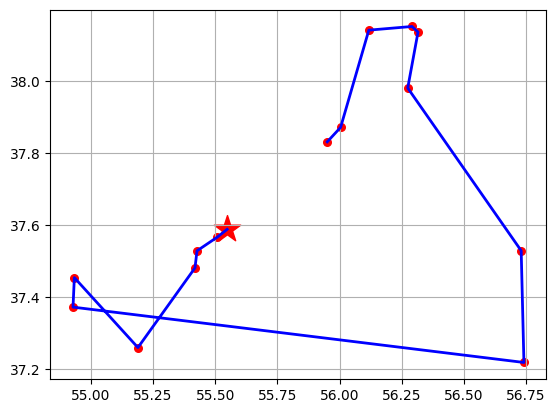

In [14]:
plot_route(routes["2022-10-28 00:00:00"]["route"][3])

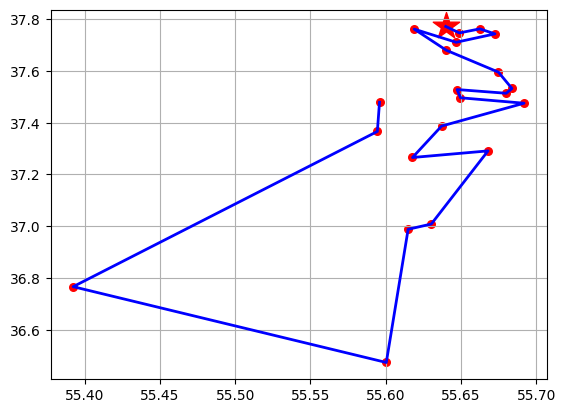

In [15]:
plot_route(routes["2022-09-14 00:00:00"]["route"][3])

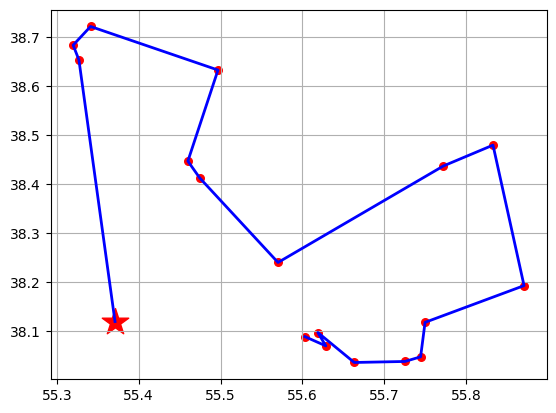

In [16]:
plot_route(routes["2022-09-14 00:00:00"]["route"][5])

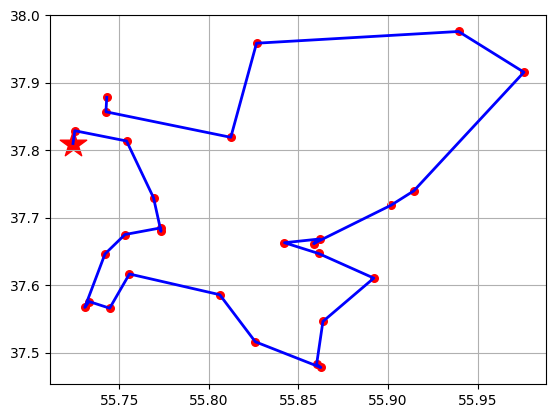

In [17]:
plot_route(routes["2022-09-14 00:00:00"]["route"][7])

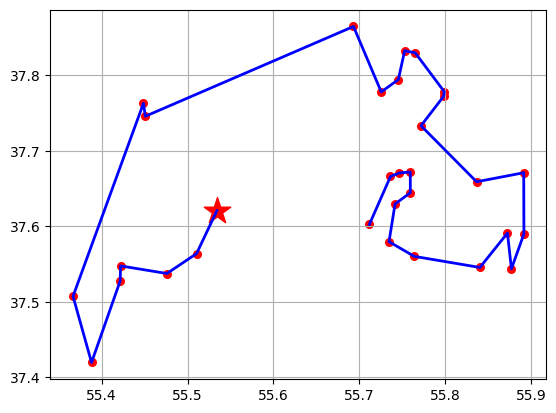

In [36]:
plot_route(routes["2022-10-05 00:00:00"]["route"][7])